## Feature Selection

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [81]:
df = pd.read_csv('data/df_fe.csv', sep=",", index_col=0)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4983 entries, 0 to 4982
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               4983 non-null   object 
 1   Stock              4983 non-null   object 
 2   Open               4983 non-null   float64
 3   Low                4983 non-null   float64
 4   Close              4983 non-null   float64
 5   Volume             4983 non-null   float64
 6   30_day_MA          4983 non-null   float64
 7   60_day_MA          4983 non-null   float64
 8   90_day_MA          4983 non-null   float64
 9   30_day_MA.1        4983 non-null   float64
 10  60_day_MA.1        4983 non-null   float64
 11  90_day_MA.1        4983 non-null   float64
 12  SMA_30             4983 non-null   float64
 13  SMA_60             4983 non-null   float64
 14  SMA_90             4983 non-null   float64
 15  EMA_30             4983 non-null   float64
 16  EMA_60             4983 

In [83]:
df.columns

Index(['date', 'Stock', 'Open', 'Low', 'Close', 'Volume', '30_day_MA',
       '60_day_MA', '90_day_MA', '30_day_MA.1', '60_day_MA.1', '90_day_MA.1',
       'SMA_30', 'SMA_60', 'SMA_90', 'EMA_30', 'EMA_60', 'EMA_90', 'RSI',
       'EMA_12', 'EMA_26', 'MACD', 'Signal_Line', 'MACD_Histogram',
       'Price_Change_Pct', 'Article Length', 'article_sentiment'],
      dtype='object')

In [84]:
df = df[['date', 'Open', 'Low', 'Close', 'Volume', '30_day_MA',
       '60_day_MA', '90_day_MA', 'SMA_30', 'SMA_60', 'SMA_90', 'EMA_30', 'EMA_60', 'EMA_90', 'RSI',
       'EMA_12', 'EMA_26', 'MACD', 'Signal_Line', 'MACD_Histogram',
       'Price_Change_Pct', 'Article Length', 'article_sentiment']]

df.head()

,date,Open,Low,Close,Volume,30_day_MA,60_day_MA,90_day_MA,SMA_30,SMA_60,...,EMA_90,RSI,EMA_12,EMA_26,MACD,Signal_Line,MACD_Histogram,Price_Change_Pct,Article Length,article_sentiment
0,2016-07-20,56.840000,55.529999,55.910000,89893300.0,51.945666,52.309333,50.519333,51.945666,52.309333,...,50.523063,71.721804,52.735685,52.177104,0.558581,0.040408,0.518174,5.311734,1394.0,4.0
1,2016-07-25,56.740002,56.259998,56.730000,25610600.0,52.099999,52.403333,50.659777,52.099999,52.403333,...,50.659480,74.606512,53.350195,52.514356,0.835840,0.199494,0.636346,0.282835,623.0,4.0
2,2016-08-01,56.750000,56.139999,56.580002,26003400.0,52.249333,52.476499,50.799666,52.249333,52.476499,...,50.789601,91.388238,53.847088,52.815515,1.031574,0.365910,0.665664,-0.176426,269.0,4.0
3,2016-08-03,57.110001,56.490002,56.970001,22075600.0,52.411666,52.548499,50.945111,52.411666,52.548499,...,50.925434,91.799325,54.327537,53.123254,1.204282,0.533585,0.670698,0.689288,904.0,4.0
4,2016-08-05,58.209999,57.450001,57.959999,29335200.0,52.606999,52.658499,51.118444,52.606999,52.658499,...,51.080040,92.480413,54.886377,53.481532,1.404845,0.707837,0.697009,0.993204,679.0,1.0


In [85]:
df.describe()

,Open,Low,Close,Volume,30_day_MA,60_day_MA,90_day_MA,SMA_30,SMA_60,SMA_90,...,EMA_90,RSI,EMA_12,EMA_26,MACD,Signal_Line,MACD_Histogram,Price_Change_Pct,Article Length,article_sentiment
count,4983.000000,4983.000000,4983.000000,4.983000e+03,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,...,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000
mean,259.294943,253.834808,256.720189,2.979736e+07,255.798546,254.855845,253.890509,255.798546,254.855845,253.890509,...,253.890586,56.153911,256.365420,255.923791,0.441629,0.438867,0.002762,0.178924,701.948224,2.599839
std,80.257335,79.085633,79.741265,1.264299e+07,80.105382,80.496333,80.896700,80.105382,80.496333,80.896700,...,80.756558,34.692417,79.850552,80.007346,2.168261,2.024397,0.687977,1.998316,482.616253,1.322692
min,56.740002,55.529999,55.910000,8.989200e+06,51.945666,52.309333,50.519333,51.945666,52.309333,50.519333,...,50.523063,0.000000,52.735685,52.177104,-6.925049,-5.925486,-3.023339,-14.739031,153.000000,1.000000
25%,216.684998,212.825005,214.724998,2.179075e+07,214.026666,213.320666,212.409500,214.026666,213.320666,212.409500,...,212.321271,29.956179,214.615885,214.087768,-0.719073,-0.651546,-0.379777,-0.846559,393.000000,1.000000
50%,266.739990,259.299988,264.600006,2.664930e+07,262.415332,262.240833,260.916000,262.415332,262.240833,260.916000,...,260.959094,59.601027,262.848663,262.066833,0.724854,0.748739,0.007699,0.169304,608.000000,2.000000
75%,326.640015,320.079987,322.955002,3.345930e+07,322.671170,322.527083,322.933003,322.671170,322.527083,322.933003,...,323.635396,87.958869,322.968505,323.083009,1.834364,1.724229,0.415283,1.227199,872.000000,4.000000
max,384.299988,378.160004,382.700012,9.701270e+07,380.630674,379.668004,378.683226,380.630674,379.668004,378.683226,...,377.553844,100.000000,382.269296,380.971581,6.306008,5.583934,2.411577,14.216888,5369.000000,5.000000


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4983 entries, 0 to 4982
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               4983 non-null   object 
 1   Open               4983 non-null   float64
 2   Low                4983 non-null   float64
 3   Close              4983 non-null   float64
 4   Volume             4983 non-null   float64
 5   30_day_MA          4983 non-null   float64
 6   60_day_MA          4983 non-null   float64
 7   90_day_MA          4983 non-null   float64
 8   SMA_30             4983 non-null   float64
 9   SMA_60             4983 non-null   float64
 10  SMA_90             4983 non-null   float64
 11  EMA_30             4983 non-null   float64
 12  EMA_60             4983 non-null   float64
 13  EMA_90             4983 non-null   float64
 14  RSI                4983 non-null   float64
 15  EMA_12             4983 non-null   float64
 16  EMA_26             4983 

In [87]:
df['date'] = pd.to_datetime(df['date'])

# Select only the numerical columns from the DataFrame
df_numerical = df.select_dtypes(include=['int64', 'float64'])
# Correlation Analysis
corr = df_numerical.corr()
corr.style.background_gradient(cmap='coolwarm')

,Open,Low,Close,Volume,30_day_MA,60_day_MA,90_day_MA,SMA_30,SMA_60,SMA_90,EMA_30,EMA_60,EMA_90,RSI,EMA_12,EMA_26,MACD,Signal_Line,MACD_Histogram,Price_Change_Pct,Article Length,article_sentiment
Open,1.000000,0.999338,0.999460,-0.136302,0.997887,0.995648,0.993629,0.997887,0.995648,0.993629,0.998534,0.996971,0.995422,-0.034416,0.999387,0.998738,-0.048336,-0.049472,-0.006765,-0.000025,-0.004995,-0.043445
Low,0.999338,1.000000,0.999462,-0.160591,0.997311,0.994563,0.992172,0.997311,0.994563,0.992172,0.997987,0.995986,0.994101,-0.028347,0.999172,0.998260,-0.038589,-0.039255,-0.006110,0.000262,-0.004975,-0.040431
Close,0.999460,0.999462,1.000000,-0.148498,0.997124,0.994561,0.992362,0.997124,0.994561,0.992362,0.997890,0.996004,0.994259,-0.019889,0.999161,0.998160,-0.035313,-0.039831,0.005911,0.019828,-0.004777,-0.042393
Volume,-0.136302,-0.160591,-0.148498,1.000000,-0.137483,-0.128583,-0.121859,-0.137483,-0.128583,-0.121859,-0.138264,-0.130728,-0.125535,-0.077031,-0.144322,-0.139501,-0.167451,-0.171769,-0.022308,0.001270,-0.011840,-0.066919
30_day_MA,0.997887,0.997311,0.997124,-0.137483,1.000000,0.998659,0.996647,1.000000,0.998659,0.996647,0.999855,0.999256,0.998015,-0.074288,0.999008,0.999803,-0.101597,-0.093127,-0.046171,-0.025583,-0.004963,-0.044094
60_day_MA,0.995648,0.994563,0.994561,-0.128583,0.998659,1.000000,0.999167,0.998659,1.000000,0.999167,0.998693,0.999728,0.999458,-0.080134,0.996691,0.998368,-0.133959,-0.133367,-0.029752,-0.026454,-0.005541,-0.045481
90_day_MA,0.993629,0.992172,0.992362,-0.121859,0.996647,0.999167,1.000000,0.996647,0.999167,1.000000,0.996895,0.998996,0.999628,-0.081492,0.994493,0.996448,-0.144056,-0.147631,-0.019606,-0.025143,-0.005667,-0.046066
SMA_30,0.997887,0.997311,0.997124,-0.137483,1.000000,0.998659,0.996647,1.000000,0.998659,0.996647,0.999855,0.999256,0.998015,-0.074288,0.999008,0.999803,-0.101597,-0.093127,-0.046171,-0.025583,-0.004963,-0.044094
SMA_60,0.995648,0.994563,0.994561,-0.128583,0.998659,1.000000,0.999167,0.998659,1.000000,0.999167,0.998693,0.999728,0.999458,-0.080134,0.996691,0.998368,-0.133959,-0.133367,-0.029752,-0.026454,-0.005541,-0.045481
SMA_90,0.993629,0.992172,0.992362,-0.121859,0.996647,0.999167,1.000000,0.996647,0.999167,1.000000,0.996895,0.998996,0.999628,-0.081492,0.994493,0.996448,-0.144056,-0.147631,-0.019606,-0.025143,-0.005667,-0.046066


#### onehotencoding 

In [88]:
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.day
df['DayOfWeek'] = df['date'].dt.dayofweek
# Converting to seconds since the epoch
df['Timestamp'] = df['date'].astype('int64') // 10**9

#### Feature Importance

In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split

df['date'] = pd.to_datetime(df['date'])


X = df.drop('Price_Change_Pct', axis=1) 
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split

#df['Date'] = pd.to_datetime(df['Date'])


X = df.drop(['Price_Change_Pct','date'], axis=1) 
y = df['Price_Change_Pct']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.ensemble import RandomForestRegressor 


model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [91]:
feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

print(importance_df)


              Feature  Importance
13                RSI    0.288822
3              Volume    0.243579
18     MACD_Histogram    0.138992
25          Timestamp    0.042725
23                Day    0.039813
16               MACD    0.037063
17        Signal_Line    0.026690
24          DayOfWeek    0.023578
22              Month    0.023216
2               Close    0.021891
19     Article Length    0.016050
0                Open    0.013253
1                 Low    0.010813
6           90_day_MA    0.007719
9              SMA_90    0.007545
12             EMA_90    0.006824
14             EMA_12    0.006738
5           60_day_MA    0.006523
8              SMA_60    0.006351
11             EMA_60    0.006233
7              SMA_30    0.005756
10             EMA_30    0.004829
4           30_day_MA    0.004711
15             EMA_26    0.004540
20  article_sentiment    0.003132
21               Year    0.002614


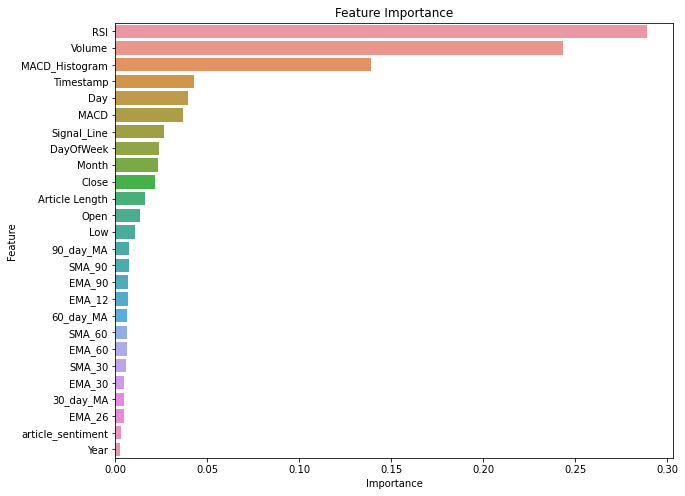

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


#### Recursive Feature Elimination (RFE):
RFE is a technique that fits a model and removes the weakest feature (or features) until the specified number of features is reached. 

In [93]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

estimator = RandomForestRegressor(random_state=42)

# Initialize RFE with the estimator and the desired number of features
selector = RFE(estimator, n_features_to_select=10, step=1) 
selector = selector.fit(X_train, y_train)
 
selected_features_mask = selector.support_

feature_ranking = selector.ranking_

# Transform the dataset to the selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)
 
selected_features = X_train.columns[selected_features_mask]
print(f"Selected features: {selected_features}")

# And to see the ranking of all features
ranking_df = pd.DataFrame({'Feature': X_train.columns, 'Ranking': feature_ranking})
print(ranking_df.sort_values(by='Ranking'))


Selected features: Index(['Open', 'Close', 'Volume', 'SMA_90', 'RSI', 'MACD', 'Signal_Line',
       'MACD_Histogram', 'Day', 'Timestamp'],
      dtype='object')
              Feature  Ranking
0                Open        1
23                Day        1
18     MACD_Histogram        1
17        Signal_Line        1
16               MACD        1
13                RSI        1
9              SMA_90        1
25          Timestamp        1
2               Close        1
3              Volume        1
24          DayOfWeek        2
22              Month        3
1                 Low        4
19     Article Length        5
8              SMA_60        6
12             EMA_90        7
7              SMA_30        8
14             EMA_12        9
6           90_day_MA       10
11             EMA_60       11
5           60_day_MA       12
4           30_day_MA       13
15             EMA_26       14
10             EMA_30       15
20  article_sentiment       16
21               Year       17


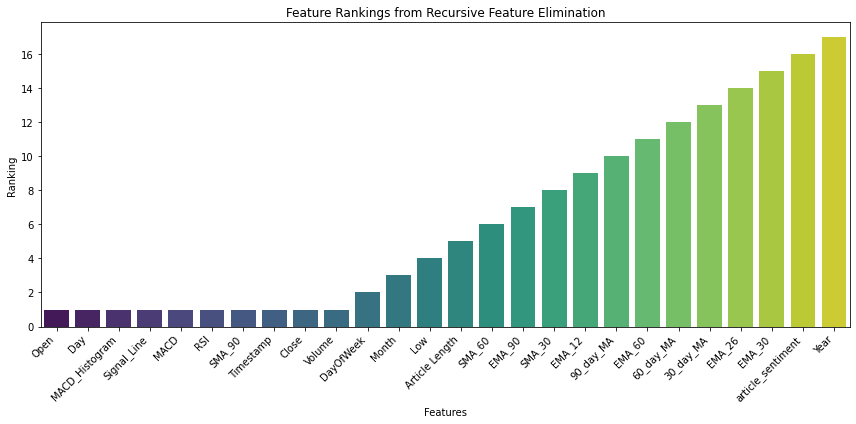

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame to hold the feature rankings
ranking_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Ranking': feature_ranking
})

# Sort the DataFrame by ranking to ensure the best features are at the top
ranking_df_sorted = ranking_df.sort_values(by='Ranking')

# Create a bar plot of feature rankings
plt.figure(figsize=(12, 6))
sns.barplot(
    data=ranking_df_sorted,
    x='Feature',
    y='Ranking',
    palette='viridis'
)

plt.title("Feature Rankings from Recursive Feature Elimination")
plt.xlabel("Features")
plt.ylabel("Ranking")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()

plt.show()


#### PCA test

##### reduce redundancy 

In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA. For example, to keep 95% of variance, set n_components to 0.95
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Interpret the results
print(f"Number of components to explain 95% variance: {pca.n_components_}")
print(f"Explained variance by component: {pca.explained_variance_ratio_}")

# 'X_pca' is the transformed data with reduced dimensions


Number of components to explain 95% variance: 8
Explained variance by component: [0.60540362 0.10054781 0.05124759 0.04308005 0.04071558 0.03822564
 0.03743006 0.03437638]


In [96]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming X_train and X_test are your data

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# variance tells you how much information (variance) can be attributed to each principal component
print(pca.explained_variance_ratio_)

[0.60483503 0.10032959 0.051461   0.04331235 0.04051431 0.03762826
 0.0374746  0.03491949]


In [97]:
X_train_pca

array([[ 0.99094976, -1.20943114,  1.15042615, ...,  0.65964794,
        -1.37739677,  0.5410712 ],
       [-2.48537389, -0.99430125, -0.55007812, ...,  1.13789501,
         1.66593289, -0.73627597],
       [ 0.77304104,  0.07027974,  0.37547109, ...,  0.10668293,
        -1.35113253, -1.36274654],
       ...,
       [ 0.0202231 ,  1.19244201, -2.98159724, ..., -0.03700148,
         0.58899924, -0.07698601],
       [-2.9634137 ,  0.5647498 ,  0.11142374, ..., -1.24314927,
         0.2462638 ,  0.71235156],
       [ 5.21368028,  0.17520191,  0.82475251, ...,  0.82519345,
         0.14332508, -0.05321318]])

In [98]:
corr_df = df[["Price_Change_Pct","article_sentiment",'RSI', 'Volume', 'MACD_Histogram', 'Timestamp', 'Day','Signal_Line', 'Month', 'DayOfWeek', 'Close', 'Article Length', 'Open', 'Low']]

In [99]:
df['date'] = pd.to_datetime(df['date'])

# Select only the numerical columns from the DataFrame
df_numerical = corr_df.select_dtypes(include=['int64', 'float64'])
# Correlation Analysis
corr = df_numerical.corr()
corr.style.background_gradient(cmap='coolwarm')

,Price_Change_Pct,article_sentiment,RSI,Volume,MACD_Histogram,Timestamp,Day,Signal_Line,Month,DayOfWeek,Close,Article Length,Open,Low
Price_Change_Pct,1.000000,-0.001388,0.483061,0.001270,0.576524,-0.000666,0.025442,0.151762,-0.015244,0.024544,0.019828,0.003119,-0.000025,0.000262
article_sentiment,-0.001388,1.000000,0.016087,-0.066919,0.000872,-0.076007,0.007273,0.033427,0.034358,-0.035718,-0.042393,0.079524,-0.043445,-0.040431
RSI,0.483061,0.016087,1.000000,-0.077031,0.627953,-0.078172,0.033025,0.439339,0.025906,0.019699,-0.019889,0.012431,-0.034416,-0.028347
Volume,0.001270,-0.066919,-0.077031,1.000000,-0.022308,-0.099458,0.099151,-0.171769,-0.283053,0.056329,-0.148498,-0.011840,-0.136302,-0.160591
MACD_Histogram,0.576524,0.000872,0.627953,-0.022308,1.000000,-0.003673,0.055095,0.046620,-0.002224,0.027773,0.005911,-0.016623,-0.006765,-0.006110
Timestamp,-0.000666,-0.076007,-0.078172,-0.099458,-0.003673,1.000000,-0.000614,-0.131879,0.206414,0.021256,0.905982,-0.019758,0.907996,0.904644
Day,0.025442,0.007273,0.033025,0.099151,0.055095,-0.000614,1.000000,-0.030410,0.012669,-0.000018,0.004424,-0.011157,0.005176,0.004534
Signal_Line,0.151762,0.033427,0.439339,-0.171769,0.046620,-0.131879,-0.030410,1.000000,0.012351,0.018175,-0.039831,0.011470,-0.049472,-0.039255
Month,-0.015244,0.034358,0.025906,-0.283053,-0.002224,0.206414,0.012669,0.012351,1.000000,-0.021019,0.277679,0.020969,0.273631,0.281900
DayOfWeek,0.024544,-0.035718,0.019699,0.056329,0.027773,0.021256,-0.000018,0.018175,-0.021019,1.000000,0.017356,0.035190,0.018348,0.016071


c:\Users\Ethan Vaz Falcao\anaconda3\lib\site-packages\seaborn\matrix.py:256: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


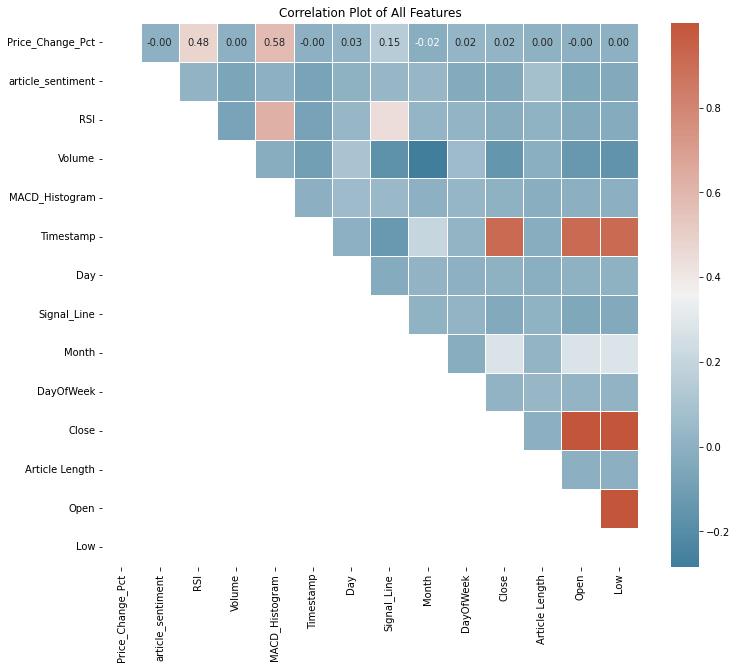

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

df_numerical = corr_df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix for all numerical features in your DataFrame
corr = df_numerical.corr()

# Set up the matplotlib figure and adjust its size
plt.figure(figsize=(12, 10))

# Generate a mask for the upper triangle (otherwise this looks like the square we had above and is redundant)
mask = np.tril(np.ones_like(corr, dtype=bool))

# Create a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, fmt=".2f", linewidths=.5)

plt.title('Correlation Plot of All Features')
plt.show()

In [ ]:
df.columns

In [101]:
df = df[['date','Year', 'Month', 'Day', 'DayOfWeek', 'Timestamp', 'Open', 'Low', 'Close', 'Volume', '30_day_MA', '60_day_MA',
       '90_day_MA', 'SMA_30', 'SMA_60', 'SMA_90', 'EMA_30', 'EMA_60', 'EMA_90', 'RSI', 'EMA_12', 'EMA_26', 'MACD', 'Signal_Line', 'MACD_Histogram',
       'Price_Change_Pct', 'Article Length', 'article_sentiment']]

#### rfe ranking

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X = df[['Year', 'Month', 'Day', 'DayOfWeek', 'Timestamp', 'Open', 'Low', 'Close', 'Volume', '30_day_MA', '60_day_MA',
       '90_day_MA', 'SMA_30', 'SMA_60', 'SMA_90', 'EMA_30', 'EMA_60', 'EMA_90', 'RSI', 'EMA_12', 'EMA_26', 'MACD', 'Signal_Line', 'MACD_Histogram',
        'Article Length', 'article_sentiment']]  # Replace with your features

y = df['Price_Change_Pct']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Recursive Feature Elimination with linear regression
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=2)  # Selects top 2 features
rfe.fit(X_train, y_train)

# Get the ranking of features
feature_ranking = rfe.ranking_

# Fit linear regression with selected features
selected_features = [feature for feature, rank in zip(X.columns, feature_ranking) if rank == 1]
model.fit(X_train[selected_features], y_train)

# Evaluate the model
y_pred = model.predict(X_test[selected_features])
mse = mean_squared_error(y_test, y_pred)

print("Selected features:", selected_features)
print("Mean Squared Error:", mse)


Selected features: ['Close', 'EMA_12']
Mean Squared Error: 2.113808817121344


### ANOVA TEST

In [104]:
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd

# Load your dataset
# Example dataset initialization, replace with your dataset
# df = pd.read_csv("your_dataset.csv")

# Set features and target variable
# Drop multiple columns
X = df.drop(["Price_Change_Pct", "date"], axis=1)  # Exclude target variable and date

y = df["Price_Change_Pct"]  # Target variable

# Get the F-statistic and p-values for each feature
F, p_values = f_regression(X, y)

# Create a DataFrame to display the features and their p-values
anova_results = pd.DataFrame({"Feature": X.columns, "P-Value": p_values, "F-Statistic": F})

# Select features with a p-value less than a threshold (e.g., 0.05)
significant_features = anova_results[anova_results["P-Value"] < 0.05]["Feature"]

# Train a linear regression model using the selected features
X_train, X_test, y_train, y_test = train_test_split(X[significant_features], y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Predict and calculate the mean squared error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Output significant features and the model's mean squared error
anova_results_sorted = anova_results.sort_values("P-Value")

anova_results_sorted, significant_features, mse


(              Feature        P-Value  F-Statistic
 23     MACD_Histogram   0.000000e+00  2479.825533
 18                RSI  9.139857e-290  1516.081003
 21               MACD  1.255830e-122   586.717593
 22        Signal_Line   4.631979e-27   117.425522
 13             SMA_60   6.186768e-02     3.488167
 10          60_day_MA   6.186768e-02     3.488167
 12             SMA_30   7.095580e-02     3.262165
 9           30_day_MA   7.095580e-02     3.262165
 2                 Day   7.252827e-02     3.226222
 11          90_day_MA   7.595471e-02     3.150716
 14             SMA_90   7.595471e-02     3.150716
 17             EMA_90   7.859593e-02     3.094971
 3           DayOfWeek   8.320757e-02     3.002314
 16             EMA_60   8.770301e-02     2.917184
 15             EMA_30   1.396726e-01     2.182259
 7               Close   1.616860e-01     1.958968
 20             EMA_26   1.621475e-01     1.954663
 1               Month   2.819857e-01     1.157746
 19             EMA_12   4.3631

### Backward Elimiation 

In [105]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from itertools import combinations

best_features = None
best_mae = float('inf')

# Perform backward elimination
for k in range(len(X.columns), 0, -1):
    for combo in combinations(X.columns, k):
        # Create a subset of features
        X_subset = X[list(combo)]
        
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=42)
        
        # Standardize the features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Fit the model
        lin_reg = LinearRegression()
        lin_reg.fit(X_train_scaled, y_train)
        
        # Predict on the test data
        y_pred = lin_reg.predict(X_test_scaled)
        
        # Calculate MAE
        mae = mean_absolute_error(y_test, y_pred)
        
        # Check if MAE is improved
        if mae < best_mae:
            best_mae = mae
            best_features = combo

print("Best feature combination:", best_features)
print("Best MAE:", best_mae)


In [ ]:

# Select only the numerical columns from the DataFrame
df_numerical = df[["MACD_Histogram","RSI","MACD", 'EMA_12',"article_sentiment","Article Length" ]]
# Correlation Analysis
corr = df_numerical.corr()
corr.style.background_gradient(cmap='coolwarm')

chi square 

In [ ]:
from scipy.stats import chi2_contingency
# Check if the 'article_sentiment' and 'Price_Change_Pct' columns are present
if 'article_sentiment' not in df.columns or 'Price_Change_Pct' not in df.columns:
    raise KeyError("Required columns 'article_sentiment' or 'Price_Change_Pct' not found in the dataset.")

# Convert the 'Price_Change_Pct' to a categorical variable ('positive', 'negative', 'neutral')
df['Price_Change_Category'] = df['Price_Change_Pct'].apply(
    lambda x: 'positive' if x > 0 else 'negative'  # You can add a 'neutral' category if needed
)

# Create a contingency table between 'article_sentiment' and 'Price_Change_Category'
contingency_table = pd.crosstab(df['article_sentiment'], df['Price_Change_Category'])

# Calculate the Chi-square statistic and related values
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Return the calculated values
chi2, p, dof, expected

(2.1940818661302997,
 0.7001129068015672,
 4,
 array([[579.96488059, 705.03511941],
        [724.84326711, 881.15673289],
        [ 91.6209111 , 111.3790889 ],
        [720.32992173, 875.67007827],
        [132.24101947, 160.75898053]]))

### article sentiment over time

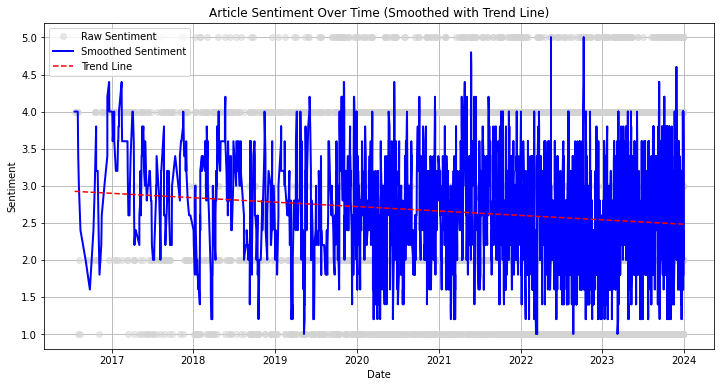

In [ ]:
# Apply a rolling average to smooth out the data
window_size = 5  # You can adjust the window size for more or less smoothing
df['smoothed_sentiment'] = df['article_sentiment'].rolling(window=window_size, min_periods=1).mean()

# Create a plot with both raw and smoothed sentiment, along with a trend line
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['article_sentiment'], marker='o', linestyle='', color='lightgray', alpha=0.5, label='Raw Sentiment')
plt.plot(df['date'], df['smoothed_sentiment'], color='b', linestyle='-', linewidth=2, label='Smoothed Sentiment')

# Fit a linear regression to find the trend line
from scipy.stats import linregress

# Perform linear regression on date and smoothed sentiment (using numeric representation for dates)
dates_numeric = df['date'].astype('int64') // 10**9  # Convert dates to numerical values (seconds since epoch)
slope, intercept, r_value, p_value, std_err = linregress(dates_numeric, df['smoothed_sentiment'])

# Add the trend line
trend_line = intercept + slope * dates_numeric
plt.plot(df['date'], trend_line, color='r', linestyle='--', linewidth=1.5, label='Trend Line')

plt.title('Article Sentiment Over Time (Smoothed with Trend Line)')
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.grid(True)
plt.legend()
plt.show()  # Display the enhanced plot


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from itertools import combinations

best_features = None
best_mae = float('inf')

# Perform backward elimination
for k in range(len(X.columns), 0, -1):
    for combo in combinations(X.columns, k):
        # Create a subset of features
        X_subset = X[list(combo)]
        
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=42)
        
        # Standardize the features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Fit the model
        lin_reg = LinearRegression()
        lin_reg.fit(X_train_scaled, y_train)
        
        # Predict on the test data
        y_pred = lin_reg.predict(X_test_scaled)
        
        # Calculate MAE
        mae = mean_absolute_error(y_test, y_pred)
        
        # Check if MAE is improved
        if mae < best_mae:
            best_mae = mae
            best_features = combo

print("Best feature combination:", best_features)
print("Best MAE:", best_mae)


In [ ]:
df.to_csv('data/df_fs.csv')